<a href="https://colab.research.google.com/github/Segrey372017/CompetitiveReport/blob/main/consumer_poll_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [60]:
data_link = 'https://github.com/Segrey372017/CompetitiveReport/blob/main/2022_%D0%9E%D0%BF%D1%80%D0%BE%D1%81_%D1%84%D0%B8%D0%B7%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%BB%D0%B8%D1%86_2021.xlsx?raw=true'

In [61]:
data = pd.read_excel(data_link)

In [62]:
data.head()

,Отметка времени,"В каком районе (городе, городском округе) вы проживаете?",Укажите Ваш пол,Каков Ваш социальный статус?,Укажите Ваш возраст,Есть ли у Вас дети?,Какое у Вас образование?,Каков примерно среднемесячный доход в расчете на одного члена вашей семьи?,Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дошкольного образования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг детского отдыха и оздоровления],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг среднего профессионального образования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дополнительного образования детей],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок медицинских услуг],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок социальных услуг],"Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок теплоснабжения (производство тепловой энергии)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок выполнения работ по благоустройству городской среды],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг жилищно-коммунального хозяйства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг по сбору и транспортированию твердых коммунальных отходов (далее – ТКО)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок купли-продажи электрической энергии (мощности) на розничном рынке электрической энергии (мощности)],"Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок производства электрической энергии (мощности) на розничном рынке электрической энергии (мощности), включая производство электрической энергии (мощности) в режиме когенерации.]",Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров автомобильным транспортом по муниципальным маршрутам регулярных перевозок],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров автомобильным транспортом по межмуниципальным маршрутам регулярных перевозок],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров и багажа легковым такси на территории субъекта Российской Федерации],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок дорожной деятельности (за исключением проектирования)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг связи],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок строительства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок архитектурно-строительного проектирования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок племенного животноводства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок семеноводства],Какое количество организаций представля

In [63]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Columns: 377 entries, Отметка времени to С какими барьерами для пользования финансовыми услугами вы сталкивались?
dtypes: datetime64[ns](1), object(376)
memory usage: 5.0+ MB
None


In [64]:
for i in range(len(data.columns)):
    print(i,'.',data.columns[i])

0 . Отметка времени
1 . В каком районе (городе, городском округе) вы проживаете?
2 . Укажите Ваш пол
3 . Каков Ваш социальный статус?
4 . Укажите Ваш возраст
5 . Есть ли у Вас дети?
6 . Какое у Вас образование?
7 . Каков примерно среднемесячный доход в расчете на одного члена вашей семьи?
8 . Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дошкольного образования]
9 . Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг детского отдыха и оздоровления]
10 . Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг среднего профессионального образования]
11 . Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дополнительного образования детей]
12 . Какое количество организаций представляют следующие товары и услуги на рынках вашего района (го

In [65]:
from collections import Counter
print(Counter(data[data.columns[1]]))

Counter({'Родниковский муниципальный район': 158, 'Городской округ Кинешма': 152, 'Городской округ Иваново': 121, 'Тейковский муниципальный район': 110, 'Городской округ Тейково': 81, 'Верхнеландеховский муниципальный район': 73, 'Ивановский муниципальный район': 61, 'Городской округ Кохма': 61, 'Комсомольский муниципальный район': 60, 'Городской округ Шуя': 59, 'Городской округ Вичуга': 59, 'Лежневский муниципальный район': 57, 'Южский муниципальный район': 54, 'Вичугский муниципальный район': 53, 'Шуйский муниципальный район': 53, 'Заволжский муниципальный район': 52, 'Лухский муниципальный район': 51, 'Савинский муниципальный район': 50, 'Гаврилово-Посадский муниципальный район': 50, 'Пучежский муниципальный район': 50, 'Фурмановский муниципальный район': 50, 'Пестяковский муниципальный район': 50, 'Кинешемский муниципальный район': 49, 'Приволжский муниципальный район': 40, 'Палехский муниципальный район': 34, 'Ильинский муниципальный район': 26, 'Юрьевецкий муниципальный район': 2

In [66]:
kin_index = data.index[data[data.columns[1]].values=='Городской округ Кинешма']
kin_data = data.iloc[kin_index,:]
kin_data.head()

,Отметка времени,"В каком районе (городе, городском округе) вы проживаете?",Укажите Ваш пол,Каков Ваш социальный статус?,Укажите Ваш возраст,Есть ли у Вас дети?,Какое у Вас образование?,Каков примерно среднемесячный доход в расчете на одного члена вашей семьи?,Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дошкольного образования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг детского отдыха и оздоровления],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг среднего профессионального образования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дополнительного образования детей],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок медицинских услуг],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок социальных услуг],"Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок теплоснабжения (производство тепловой энергии)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок выполнения работ по благоустройству городской среды],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг жилищно-коммунального хозяйства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг по сбору и транспортированию твердых коммунальных отходов (далее – ТКО)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок купли-продажи электрической энергии (мощности) на розничном рынке электрической энергии (мощности)],"Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок производства электрической энергии (мощности) на розничном рынке электрической энергии (мощности), включая производство электрической энергии (мощности) в режиме когенерации.]",Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров автомобильным транспортом по муниципальным маршрутам регулярных перевозок],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров автомобильным транспортом по межмуниципальным маршрутам регулярных перевозок],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров и багажа легковым такси на территории субъекта Российской Федерации],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок дорожной деятельности (за исключением проектирования)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг связи],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок строительства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок архитектурно-строительного проектирования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок племенного животноводства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок семеноводства],Какое количество организаций представля

In [67]:
def make_hist(d_info):
    "Выодит гистограму по полученным данным"
    plt.figure(figsize= (8,6))
    sns.histplot(d_info)
    plt.xticks(rotation = 90)
    plt.ylabel('Число опрошенных')
    plt.show()
    return

In [68]:
def calc_percent(cnt, r = 2):
    """ Считает процентное соотношение числа опрошенных,всего опрошенных 100%
        r - окгугление до r знаков после запятой
    """
    s = sum(cnt.values())
    p_cnt = dict()

    for key in cnt.keys():
        p_cnt[key] = round(cnt[key] / s * 100, r)

    p_cnt['Всего'] = s
    return p_cnt

In [69]:
kin_data.shape

(152, 377)

In [70]:
# Пол опрошенных

gender = dict(Counter(kin_data.iloc[:,2]).most_common())
print(gender)
print(calc_percent(gender))

{'Мужской': 80, 'Женский': 72}
{'Мужской': 52.63, 'Женский': 47.37, 'Всего': 152}


In [71]:
# социальный статут опрошенных
work = dict(Counter(kin_data.iloc[:, 3]).most_common())
print(work)
print(calc_percent(work))

{'Учусь (студент)': 39, 'Пенсионер': 38, 'Работаю': 33, 'Без работы': 27, 'Домохозяйка': 15}
{'Учусь (студент)': 25.66, 'Пенсионер': 25.0, 'Работаю': 21.71, 'Без работы': 17.76, 'Домохозяйка': 9.87, 'Всего': 152}


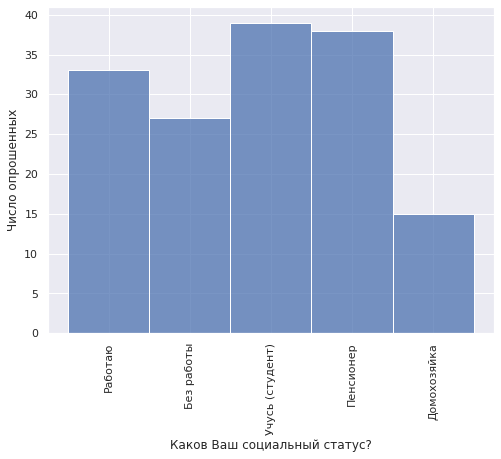

In [72]:
make_hist(kin_data.iloc[:, 3])

In [73]:
# возраст
age = dict(Counter(kin_data.iloc[:, 4]).most_common())
print(age)
print(calc_percent(age))

{'от 25 до 34 лет': 43, 'от 45 до 54 лет': 40, 'от 18 до 24 лет': 26, 'от 55 до 64 лет': 25, 'от 35 до 44 лет': 18}
{'от 25 до 34 лет': 28.29, 'от 45 до 54 лет': 26.32, 'от 18 до 24 лет': 17.11, 'от 55 до 64 лет': 16.45, 'от 35 до 44 лет': 11.84, 'Всего': 152}


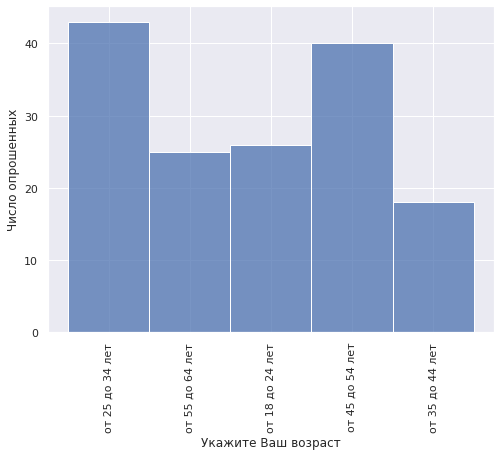

In [74]:
# возраст опрошенных
make_hist(kin_data.iloc[:, 4])

In [75]:
# детность
child = dict(Counter(kin_data.iloc[:, 5]).most_common())
print(child)
print(calc_percent(child))

{'нет': 92, '1 ребенок': 51, '2 детей': 9}
{'нет': 60.53, '1 ребенок': 33.55, '2 детей': 5.92, 'Всего': 152}


In [76]:
# образование
education = dict(Counter(kin_data.iloc[:, 6]).most_common())
print(education)
print(calc_percent(education))

{'Среднее профессиональное образование': 82, 'Высшее - специалитет, магистратура': 52, 'Высшее - бакалавриат': 18}
{'Среднее профессиональное образование': 53.95, 'Высшее - специалитет, магистратура': 34.21, 'Высшее - бакалавриат': 11.84, 'Всего': 152}


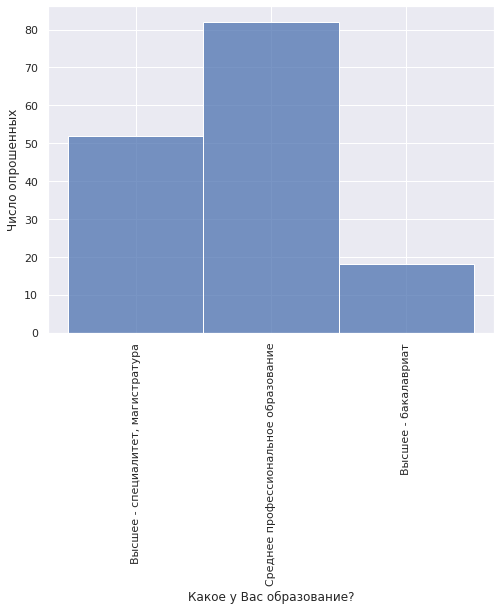

In [77]:
make_hist(kin_data.iloc[:, 6])

In [78]:
# уровень дохода
income = dict(Counter(kin_data.iloc[:, 7]).most_common())
print(income)
print(calc_percent(income))

{'От 10 до 20 тыс. рублей': 84, 'До 10 тыс. рублей': 36, 'От 20 до 30 тыс. рублей': 32}
{'От 10 до 20 тыс. рублей': 55.26, 'До 10 тыс. рублей': 23.68, 'От 20 до 30 тыс. рублей': 21.05, 'Всего': 152}


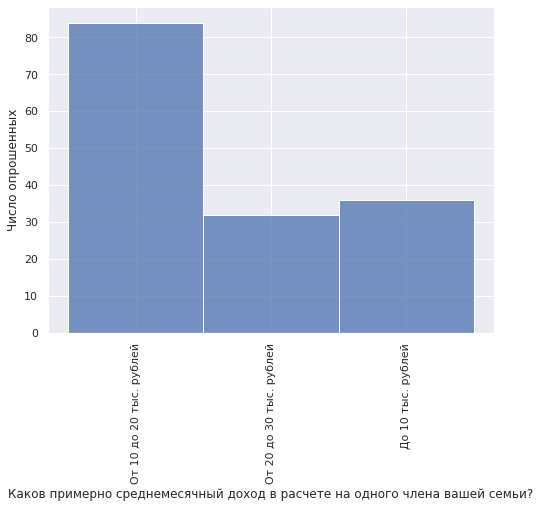

In [79]:
make_hist(kin_data.iloc[:, 7])

In [80]:
# Блок количество организаций действующих в различных сегментах рынка
from IPython.display import HTML, display
st = 8
end =40 

html_str = "<table> "
for i in range(st, end+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дошкольного образования],Достаточно,47,Мало,35,Избыточно (много),34,Нет совсем,26,Затрудняюсь ответить,10
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг детского отдыха и оздоровления],Достаточно,52,Мало,40,Нет совсем,28,Избыточно (много),19,Затрудняюсь ответить,13
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг среднего профессионального образования],Достаточно,55,Мало,45,Нет совсем,24,Избыточно (много),23,Затрудняюсь ответить,5
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дополнительного образования детей],Мало,43,Достаточно,41,Нет совсем,37,Затрудняюсь ответить,16,Избыточно (много),15
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок медицинских услуг],Достаточно,39,Мало,37,Нет совсем,34,Избыточно (много),33,Затрудняюсь ответить,9
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок социальных услуг],Достаточно,45,Мало,44,Нет совсем,27,Избыточно (много),26,Затрудняюсь ответить,10
"Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Достаточно,49,Мало,38,Нет совсем,29,Избыточно (много),22,Затрудняюсь ответить,14
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок теплоснабжения (производство тепловой энергии)],Достаточно,52,Нет совсем,36,Мало,34,Избыточно (много),19,Затрудняюсь ответить,11
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок выполнения работ по благоустройству городской среды],Достаточно,54,Мало,34,Нет совсем,33,Избыточно (много),23,Затрудняюсь ответить,8
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг жилищно-коммунального хозяйства],Достаточно,54,Мало,42,Нет совсем,25,Избыточно (много),24,Затрудняюсь ответить,7
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг по сбору и транспортированию твердых коммунальных отходов (далее – ТКО)],Мало,50,Достаточно,47,Нет совсем,30,Избыточно (много),14,Затрудняюсь ответить,11


In [81]:
# Блок Удовлетворенность  УРОВНЕМ ЦЕН на соответствующих рынках
from IPython.display import HTML, display
st = 41
end = 73

html_str = "<table> "
for i in range(st, end+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок услуг дошкольного образования],Скорее не удовлетворен,59,Скорее удовлетворен,49,Не удовлетворен,26,Удовлетворен,18
Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок услуг детского отдыха и оздоровления],Скорее удовлетворен,55,Скорее не удовлетворен,52,Не удовлетворен,26,Удовлетворен,19
Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок услуг среднего профессионального образования],Скорее не удовлетворен,51,Скорее удовлетворен,46,Не удовлетворен,33,Удовлетворен,22
Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок услуг дополнительного образования детей],Скорее не удовлетворен,59,Скорее удовлетворен,54,Не удовлетворен,22,Удовлетворен,17
Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок медицинских услуг],Скорее не удовлетворен,61,Скорее удовлетворен,43,Не удовлетворен,34,Удовлетворен,14
Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок социальных услуг],Скорее удовлетворен,50,Скорее не удовлетворен,44,Не удовлетворен,34,Удовлетворен,24
"Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Скорее не удовлетворен,52,Скорее удовлетворен,38,Не удовлетворен,38,Удовлетворен,24
Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок теплоснабжения (производство тепловой энергии)],Скорее удовлетворен,52,Скорее не удовлетворен,49,Не удовлетворен,28,Удовлетворен,23
Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок выполнения работ по благоустройству городской среды],Скорее не удовлетворен,55,Скорее удовлетворен,52,Не удовлетворен,25,Удовлетворен,20
Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок услуг жилищно-коммунального хозяйства],Скорее удовлетворен,57,Скорее не удовлетворен,53,Не удовлетворен,29,Удовлетворен,13
Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок услуг по сбору и транспортированию твердых коммунальных отходов (далее – ТКО)],Скорее не удовлетворен,63,Скорее удовлетворен,35,Не удовлетворен,27,Удовлетворен,27


In [82]:
# удовлетворенность КАЧЕСТВОМ товаров услуг
st3 = 74
end3 =106 

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг дошкольного образования],Скорее удовлетворен,74,Скорее не удовлетворен,44,Удовлетворен,24,Не удовлетворен,10
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг детского отдыха и оздоровления],Скорее удовлетворен,75,Скорее не удовлетворен,43,Удовлетворен,27,Не удовлетворен,7
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг среднего профессионального образования],Скорее удовлетворен,73,Скорее не удовлетворен,43,Удовлетворен,28,Не удовлетворен,8
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг дополнительного образования детей],Скорее удовлетворен,78,Скорее не удовлетворен,35,Удовлетворен,30,Не удовлетворен,9
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок медицинских услуг],Скорее удовлетворен,84,Скорее не удовлетворен,38,Удовлетворен,24,Не удовлетворен,6
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок социальных услуг],Скорее удовлетворен,82,Скорее не удовлетворен,39,Удовлетворен,21,Не удовлетворен,10
"Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Скорее удовлетворен,77,Скорее не удовлетворен,40,Удовлетворен,27,Не удовлетворен,8
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок теплоснабжения (производство тепловой энергии)],Скорее удовлетворен,63,Удовлетворен,43,Скорее не удовлетворен,36,Не удовлетворен,10
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок выполнения работ по благоустройству городской среды],Скорее удовлетворен,63,Скорее не удовлетворен,59,Удовлетворен,22,Не удовлетворен,8
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг жилищно-коммунального хозяйства],Скорее удовлетворен,68,Скорее не удовлетворен,42,Удовлетворен,33,Не удовлетворен,9
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг по сбору и транспортированию твердых коммунальных отходов (далее – ТКО)],Скорее удовлетворен,68,Скорее не удовлетворен,50,Удовлетворен,25,Не удовлетворен,9


In [83]:
# Удовлетворенность АССОРТИМЕНТОМ товаров услуг
st2 = 107
end2 =139

html_str = "<table> "
for i in range(st2, end2+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг дошкольного образования],Скорее не удовлетворен,52,Скорее удовлетворен,50,Удовлетворен,27,Не удовлетворен,23
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг детского отдыха и оздоровления],Скорее удовлетворен,56,Скорее не удовлетворен,48,Удовлетворен,30,Не удовлетворен,18
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг среднего профессионального образования],Скорее не удовлетворен,53,Скорее удовлетворен,49,Удовлетворен,33,Не удовлетворен,17
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг дополнительного образования детей],Скорее удовлетворен,60,Скорее не удовлетворен,53,Не удовлетворен,20,Удовлетворен,19
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок медицинских услуг],Скорее не удовлетворен,55,Скорее удовлетворен,53,Удовлетворен,23,Не удовлетворен,21
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок социальных услуг],Скорее не удовлетворен,57,Скорее удовлетворен,54,Удовлетворен,31,Не удовлетворен,10
"Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Скорее удовлетворен,62,Скорее не удовлетворен,42,Удовлетворен,28,Не удовлетворен,20
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок теплоснабжения (производство тепловой энергии)],Скорее не удовлетворен,54,Скорее удовлетворен,48,Удовлетворен,38,Не удовлетворен,12
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок выполнения работ по благоустройству городской среды],Скорее не удовлетворен,52,Скорее удовлетворен,45,Удовлетворен,34,Не удовлетворен,21
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг жилищно-коммунального хозяйства],Скорее удовлетворен,63,Скорее не удовлетворен,50,Удовлетворен,24,Не удовлетворен,15
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг по сбору и транспортированию твердых коммунальных отходов (далее – ТКО)],Скорее удовлетворен,54,Скорее не удовлетворен,52,Не удовлетворен,26,Удовлетворен,20


In [84]:
# На какие товары и (или) услуги, по вашему мнению, цены в ивановской области  выше по сравнению с другими регионами
price = dict(Counter(kin_data.iloc[:, 140]).most_common())
print(price)
print(calc_percent(price))

{'Услуги жилищно-коммунального хозяйства': 52, 'Перевозка пассажиров автобусами в пределах Вашего населенного пункта': 48, 'Лекарственные препараты': 35, 'Нефтепродукты': 9, 'Медицинские услуги': 6, 'Электроэнергия': 1, 'Социальные услуги': 1}
{'Услуги жилищно-коммунального хозяйства': 34.21, 'Перевозка пассажиров автобусами в пределах Вашего населенного пункта': 31.58, 'Лекарственные препараты': 23.03, 'Нефтепродукты': 5.92, 'Медицинские услуги': 3.95, 'Электроэнергия': 0.66, 'Социальные услуги': 0.66, 'Всего': 152}


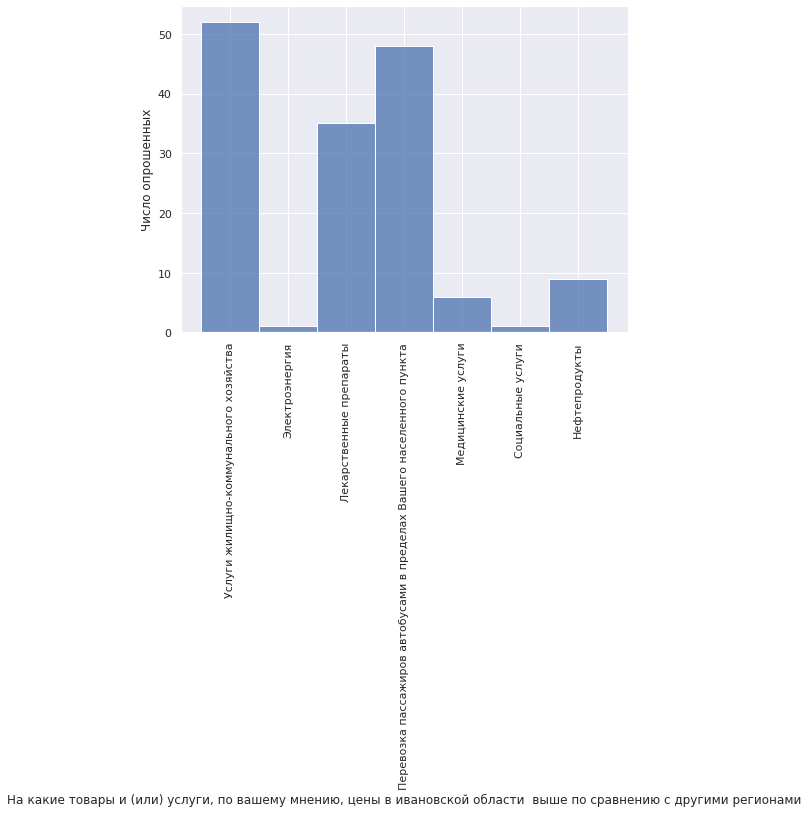

In [85]:
make_hist(kin_data.iloc[:, 140])

In [86]:
# На каких рынках товаров и услуг, на ваш взгляд, слабо развита конкуренция, что негативно сказывается на качестве товара и ценах?
markets = dict(Counter(kin_data.iloc[:, 141]).most_common())
print(markets)
print(calc_percent(markets))

{'Лекарства': 47, 'Деских товаров': 40, 'Бензин': 34, 'ЖКХ': 15, 'Продукты питания': 12, 'Нефтепродукты': 1, 'затрудняюсь ответить': 1, 'Лекарств': 1, 'Медецина , развлечения, рынок труда': 1}
{'Лекарства': 30.92, 'Деских товаров': 26.32, 'Бензин': 22.37, 'ЖКХ': 9.87, 'Продукты питания': 7.89, 'Нефтепродукты': 0.66, 'затрудняюсь ответить': 0.66, 'Лекарств': 0.66, 'Медецина , развлечения, рынок труда': 0.66, 'Всего': 152}


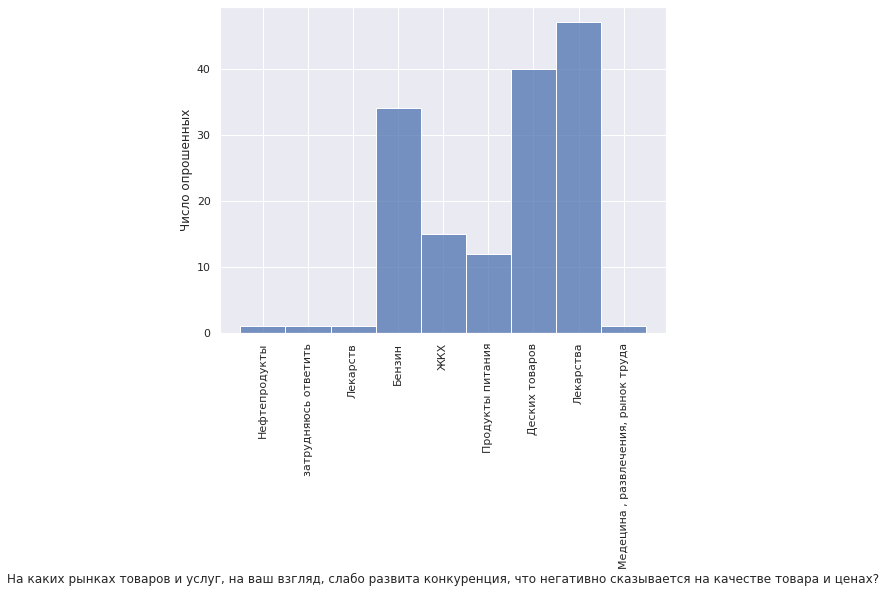

In [87]:
make_hist(kin_data.iloc[:, 141])

In [88]:
# Изменение  КОЛЛИЧЕСТВА товаров услуг
st3 = 142
end3 =174

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Услуги дошкольного образования]",Не изменилось,63,Увеличилось,45,Снизилось,26,Затрудняюсь ответить,18
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Услуги детского отдыха и оздоровления]",Не изменилось,70,Увеличилось,51,Снизилось,23,Затрудняюсь ответить,8
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Услуги среднего профессионального образования]",Не изменилось,77,Увеличилось,41,Снизилось,21,Затрудняюсь ответить,13
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Услуги дополнительного образования детей]",Не изменилось,80,Увеличилось,36,Снизилось,27,Затрудняюсь ответить,9
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Медицинские услуги]",Не изменилось,63,Снизилось,40,Увеличилось,35,Затрудняюсь ответить,14
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Социальные услуги]",Не изменилось,69,Увеличилось,51,Снизилось,22,Затрудняюсь ответить,10
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Лекарственные препараты]",Не изменилось,65,Увеличилось,48,Снизилось,31,Затрудняюсь ответить,8
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Услуги теплоснабжения]",Не изменилось,70,Увеличилось,44,Снизилось,26,Затрудняюсь ответить,12
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Работы по благоустройству городской среды]",Не изменилось,61,Увеличилось,43,Снизилось,38,Затрудняюсь ответить,10
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Услуги жилищно-коммунального хозяйства]",Не изменилось,64,Увеличилось,50,Снизилось,28,Затрудняюсь ответить,10
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Услуги по сбору и транспортированию твердых коммунальных отходов]",Не изменилось,69,Увеличилось,43,Снизилось,35,Затрудняюсь ответить,5


In [89]:
# Изменение КАЧЕСТВА товаров услуг
st3 = 175
end3 = 207

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дошкольного образования]",Не изменилось,71,Снизилось,60,Увеличилось,17,Затрудняюсь ответить,4
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги детского отдыха и оздоровления]",Не изменилось,78,Снизилось,47,Увеличилось,25,Затрудняюсь ответить,2
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги среднего профессионального образования]",Не изменилось,83,Снизилось,51,Увеличилось,15,Затрудняюсь ответить,3
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дополнительного образования детей]",Не изменилось,82,Снизилось,51,Увеличилось,17,Затрудняюсь ответить,2
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Медицинские услуги]",Не изменилось,73,Снизилось,47,Увеличилось,28,Затрудняюсь ответить,4
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Социальные услуги]",Не изменилось,71,Снизилось,64,Увеличилось,15,Затрудняюсь ответить,2
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Лекарственные препараты]",Не изменилось,74,Снизилось,58,Увеличилось,18,Затрудняюсь ответить,2
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги теплоснабжения]",Не изменилось,82,Снизилось,56,Увеличилось,10,Затрудняюсь ответить,4
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Работы по благоустройству городской среды]",Не изменилось,76,Снизилось,58,Увеличилось,16,Затрудняюсь ответить,2
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги жилищно-коммунального хозяйства]",Не изменилось,74,Снизилось,62,Увеличилось,11,Затрудняюсь ответить,5
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги по сбору и транспортированию твердых коммунальных отходов]",Снизилось,67,Не изменилось,67,Увеличилось,17,Затрудняюсь ответить,1


In [90]:
# Изменение УровняЦЕН товаров услуг
st3 = 208
end3 = 240

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дошкольного образования]",Увеличился,55,Не изменился,46,Затрудняюсь ответить,29,Снизился,22
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги детского отдыха и оздоровления]",Увеличился,56,Не изменился,54,Затрудняюсь ответить,28,Снизился,14
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги среднего профессионального образования]",Увеличился,59,Не изменился,56,Затрудняюсь ответить,20,Снизился,17
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дополнительного образования детей]",Увеличился,60,Не изменился,56,Снизился,20,Затрудняюсь ответить,16
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Медицинские услуги]",Увеличился,54,Не изменился,44,Затрудняюсь ответить,32,Снизился,22
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Социальные услуги]",Увеличился,71,Не изменился,40,Затрудняюсь ответить,21,Снизился,20
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Лекарственные препараты]",Увеличился,54,Не изменился,53,Затрудняюсь ответить,26,Снизился,19
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги теплоснабжения]",Увеличился,52,Не изменился,46,Затрудняюсь ответить,34,Снизился,20
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Работы по благоустройству городской среды]",Увеличился,64,Не изменился,48,Затрудняюсь ответить,26,Снизился,14
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги жилищно-коммунального хозяйства]",Увеличился,55,Не изменился,48,Затрудняюсь ответить,28,Снизился,21
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги по сбору и транспортированию твердых коммунальных отходов]",Не изменился,51,Увеличился,48,Затрудняюсь ответить,31,Снизился,22


In [91]:
# Изменение АССОРТИМЕНТА товаров услуг
st3 = 241
end3 = 273

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дошкольного образования]",Увеличился,58,Не изменился,48,Затрудняюсь ответить,30,Снизился,16
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги детского отдыха и оздоровления]",Не изменился,56,Увеличился,53,Затрудняюсь ответить,23,Снизился,20
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги среднего профессионального образования]",Увеличился,56,Не изменился,42,Затрудняюсь ответить,34,Снизился,20
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дополнительного образования детей]",Не изменился,61,Увеличился,45,Затрудняюсь ответить,27,Снизился,19
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Медицинские услуги]",Не изменился,57,Увеличился,47,Затрудняюсь ответить,28,Снизился,20
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Социальные услуги]",Увеличился,59,Не изменился,44,Затрудняюсь ответить,36,Снизился,13
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Лекарственные препараты]",Увеличился,64,Не изменился,41,Затрудняюсь ответить,31,Снизился,16
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги теплоснабжения]",Не изменился,58,Увеличился,55,Снизился,20,Затрудняюсь ответить,19
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Работы по благоустройству городской среды]",Не изменился,62,Увеличился,51,Затрудняюсь ответить,27,Снизился,12
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги жилищно-коммунального хозяйства]",Не изменился,60,Увеличился,47,Затрудняюсь ответить,35,Снизился,10
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги по сбору и транспортированию твердых коммунальных отходов]",Увеличился,71,Не изменился,48,Затрудняюсь ответить,22,Снизился,11


In [92]:
# Качество официальной информации товаров услуг
st3 = 274
end3 = 276

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Оцените качество официальной информации о состоянии конкурентной среды на рынках товаров и услуг (субъекта), размещаемой в открытом доступе [Уровень доступности]",Скорее удовлетворительное,75,Скорее неудовлетворительное,38,Удовлетворительное,33,Неудовлетворительное,5,Затрудняюсь ответить/ мне ничего не известно о такой информации,1
"Оцените качество официальной информации о состоянии конкурентной среды на рынках товаров и услуг (субъекта), размещаемой в открытом доступе [Уровень понятности]",Скорее удовлетворительное,86,Скорее неудовлетворительное,36,Удовлетворительное,27,Неудовлетворительное,2,Затрудняюсь ответить/ мне ничего не известно о такой информации,1
"Оцените качество официальной информации о состоянии конкурентной среды на рынках товаров и услуг (субъекта), размещаемой в открытом доступе [Уровень получения]",Скорее удовлетворительное,82,Удовлетворительное,34,Скорее неудовлетворительное,33,Неудовлетворительное,2,Затрудняюсь ответить/ мне ничего не известно о такой информации,1


In [93]:
# Качество услуг ЕСТЕСТВЕННЫХ МОНОПОЛИЙ
st3 = 277
end3 = 282

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Оцените качество услуг естественных монополий в вашем городе (поселке, селе) [Услуги по водоснабжению, водоотведению]",неудовлетворительное,73,Удовлетворительное,49,затрудняюсь ответить,24,Хорошее,6
"Оцените качество услуг естественных монополий в вашем городе (поселке, селе) [Услуги газоснабжения]",неудовлетворительное,69,Удовлетворительное,43,затрудняюсь ответить,31,Хорошее,9
"Оцените качество услуг естественных монополий в вашем городе (поселке, селе) [Услуги электроснабжения]",неудовлетворительное,69,Удовлетворительное,46,затрудняюсь ответить,30,Хорошее,7
"Оцените качество услуг естественных монополий в вашем городе (поселке, селе) [Услуги теплоснабжения]",неудовлетворительное,58,Удовлетворительное,54,затрудняюсь ответить,31,Хорошее,9
"Оцените качество услуг естественных монополий в вашем городе (поселке, селе) [Услуги проводной телефонной связи]",неудовлетворительное,72,Удовлетворительное,43,затрудняюсь ответить,27,Хорошее,10
"Оцените качество услуг естественных монополий в вашем городе (поселке, селе) [Услуги почтовой связи]",неудовлетворительное,70,Удовлетворительное,50,затрудняюсь ответить,23,Хорошее,9


In [94]:
# С какими проблемами Вы столкнулись при взаимодействии с субъектами естественных монополий?
monopoly = dict(Counter(kin_data.iloc[:, 289]).most_common())
print(monopoly)
print(calc_percent(monopoly))

{'Навязывание дополнительных услуг': 71, 'Проблемы с заменой приборов учета': 47, 'Взимание дополнительной платы': 26, 'Не сталкивался с подобными проблемами': 7, 'Затрудняюсь ответить': 1}
{'Навязывание дополнительных услуг': 46.71, 'Проблемы с заменой приборов учета': 30.92, 'Взимание дополнительной платы': 17.11, 'Не сталкивался с подобными проблемами': 4.61, 'Затрудняюсь ответить': 0.66, 'Всего': 152}


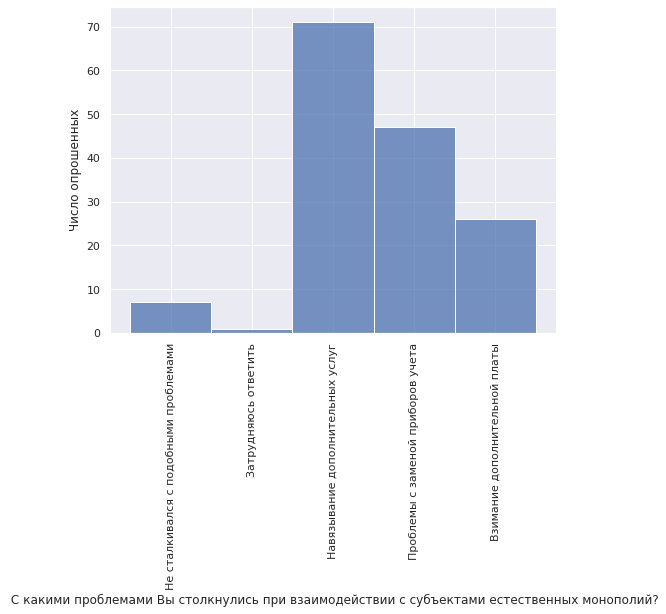

In [95]:
make_hist(kin_data.iloc[:, 289])

In [96]:
# Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта ....
st3 = 290
end3 = 297

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Официальная информация, размещенная на официальном сайте уполномоченного органа в информационно-телекоммуникационной сети ""Интернет""]",Доверяю больше всего,79,Предпочитаю пользоваться,57,Затрудняюсь ответить,16
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Официальная информация, размещенная на интернет-портале об инвестиционной деятельности в субъекте Российской Федерации]",Доверяю больше всего,74,Предпочитаю пользоваться,63,Затрудняюсь ответить,15
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Официальная информация, размещенная на сайте Федеральной антимонопольной службы]",Доверяю больше всего,85,Предпочитаю пользоваться,51,Затрудняюсь ответить,16
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Информация, размещенная на официальных сайтах других исполнительных органов государственной власти субъекта Российской Федерации и муниципальных образований органов местного самоуправления в информационно-телекоммуникационной сети ""Интернет""]",Доверяю больше всего,74,Предпочитаю пользоваться,67,Затрудняюсь ответить,11
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Телевидение]",Доверяю больше всего,71,Предпочитаю пользоваться,66,Затрудняюсь ответить,15
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Печатные средства массовой информации]",Предпочитаю пользоваться,72,Доверяю больше всего,67,Затрудняюсь ответить,13
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Радио]",Предпочитаю пользоваться,71,Доверяю больше всего,69,Затрудняюсь ответить,12
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Специальные блоги, порталы и прочие электронные ресурсы]",Предпочитаю пользоваться,74,Доверяю больше всего,66,Затрудняюсь ответить,12


In [97]:
# Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг?
st3 = 298
end3 = 305

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг? [Общественная организация по защите прав потребителей],Обращался - безрезультатно,80,"Обращался, мне помогли",42,Не обращался,30
Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг? [Роспотребнадзор],Обращался - безрезультатно,75,"Обращался, мне помогли",42,Не обращался,35
Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг? [Росстандарт],Обращался - безрезультатно,79,"Обращался, мне помогли",45,Не обращался,28
Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг? [Федеральная антимонопольная служба],Обращался - безрезультатно,81,"Обращался, мне помогли",37,Не обращался,34
"Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг? [Органы местного самоуправления (администрации муниципальных образований, комитеты муниципальных образований и т.д.)]",Обращался - безрезультатно,75,"Обращался, мне помогли",43,Не обращался,34
"Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг? [Органы власти региона (Правительство КО, Законодательное собрание КО, министерства и ведомства и т.д.)]",Обращался - безрезультатно,86,Не обращался,33,"Обращался, мне помогли",33
Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг? [Прокуратура],Обращался - безрезультатно,65,"Обращался, мне помогли",46,Не обращался,41
Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг? [Органы судебной власти],Обращался - безрезультатно,76,"Обращался, мне помогли",41,Не обращался,35


<h2> Финансовые услуги</h2> 

In [98]:
# Как часто вы пользуетесь услугами финансовых организаций?
fin_serv = dict(Counter(kin_data.iloc[:, 306]).most_common())
print(fin_serv)
print(calc_percent(fin_serv))

{'Не реже, чем раз в месяц': 89, 'Не реже, чем раз в неделю': 38, 'Не реже, чем раз в три месяца': 23, '1 раз в год и реже': 2}
{'Не реже, чем раз в месяц': 58.55, 'Не реже, чем раз в неделю': 25.0, 'Не реже, чем раз в три месяца': 15.13, '1 раз в год и реже': 1.32, 'Всего': 152}


In [99]:
# Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев?
st4 = 307
end4 = 314

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Банковский вклад],Не использовался за последние 12 месяцев,74,"Не имеется сейчас, но использовался за последние 12 месяцев",66,Имеется сейчас,12
Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Договор на размещение средств в форме займа в микрофинансовой организации],Не использовался за последние 12 месяцев,84,"Не имеется сейчас, но использовался за последние 12 месяцев",57,Имеется сейчас,11
Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Договор на размещение средств в форме займа в кредитном потребительском кооперативе],Не использовался за последние 12 месяцев,81,"Не имеется сейчас, но использовался за последние 12 месяцев",65,Имеется сейчас,6
Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Договор на размещение средств в форме займа в сельскохозяйственном кредитном потребительском кооперативе],Не использовался за последние 12 месяцев,73,"Не имеется сейчас, но использовался за последние 12 месяцев",71,Имеется сейчас,8
Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Индивидуальный инвестиционный счет],"Не имеется сейчас, но использовался за последние 12 месяцев",82,Не использовался за последние 12 месяцев,65,Имеется сейчас,5
Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Инвестиционное страхование жизни],Не использовался за последние 12 месяцев,84,"Не имеется сейчас, но использовался за последние 12 месяцев",64,Имеется сейчас,4
Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Брокерский счет],"Не имеется сейчас, но использовался за последние 12 месяцев",74,Не использовался за последние 12 месяцев,70,Имеется сейчас,8
Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Вложение средств в паевой инвестиционный фонд],"Не имеется сейчас, но использовался за последние 12 месяцев",77,Не использовался за последние 12 месяцев,69,Имеется сейчас,6


In [100]:
# Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев?
fin_prod = dict(Counter(kin_data.iloc[:, 316]).most_common())
print(fin_prod)
print(calc_percent(fin_prod))

{'Иной кредит в банке, не являющийся онлайн-кредитом': 87, 'Онлайн-кредит в банке (договор заключен с использованием информационно-телекоммуникационной сети "Интернет", сумма кредита предоставлена получателю финансовой услуги в безналичной форме)': 35, 'Использование кредитного лимита по кредитной карте': 28, nan: 2}
{'Иной кредит в банке, не являющийся онлайн-кредитом': 57.24, 'Онлайн-кредит в банке (договор заключен с использованием информационно-телекоммуникационной сети "Интернет", сумма кредита предоставлена получателю финансовой услуги в безналичной форме)': 23.03, 'Использование кредитного лимита по кредитной карте': 18.42, nan: 1.32, 'Всего': 152}


In [101]:
#  Какими из перечисленных платежных карт Вы пользовались за последние 12 месяцев? 
st4 = 318
end4 = 321

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Какими из перечисленных платежных карт Вы пользовались за последние 12 месяцев? [Зарплатная карта (банковская карта, предназначенная для выплаты сотруднику заработной платы и других денежных начислений (премий, командировочных, материальной помощи и т.д.) организацией, заключившей с банком договор на обслуживание в рамках зарплатного проекта)]","Не имеется сейчас, но использовался за последние 12 месяцев",75,Не использовался за последние 12 месяцев,66,Имеется сейчас,11
Какими из перечисленных платежных карт Вы пользовались за последние 12 месяцев? [Расчетная (дебетовая) карта для получения пенсий и иных социальных выплат],Не использовался за последние 12 месяцев,73,"Не имеется сейчас, но использовался за последние 12 месяцев",70,Имеется сейчас,9
"Какими из перечисленных платежных карт Вы пользовались за последние 12 месяцев? [Другая расчетная (дебетовая) карта, кроме зарплатной карты и (или) карты для получения пенсий и иных социальных выплат]","Не имеется сейчас, но использовался за последние 12 месяцев",73,Не использовался за последние 12 месяцев,70,Имеется сейчас,9
Какими из перечисленных платежных карт Вы пользовались за последние 12 месяцев? [Кредитная карта],Не использовался за последние 12 месяцев,76,"Не имеется сейчас, но использовался за последние 12 месяцев",69,Имеется сейчас,7


In [102]:
# Пользовались ли Вы за последние 12 месяцев текущим счетом
current = dict(Counter(kin_data.iloc[:, 323]).most_common())
print(current)
print(calc_percent(current))

{'Не имеется сейчас, но использовался за последние 12 месяцев': 91, 'Не использовался за последние 12 месяцев': 32, 'Имеется сейчас': 29}
{'Не имеется сейчас, но использовался за последние 12 месяцев': 59.87, 'Не использовался за последние 12 месяцев': 21.05, 'Имеется сейчас': 19.08, 'Всего': 152}


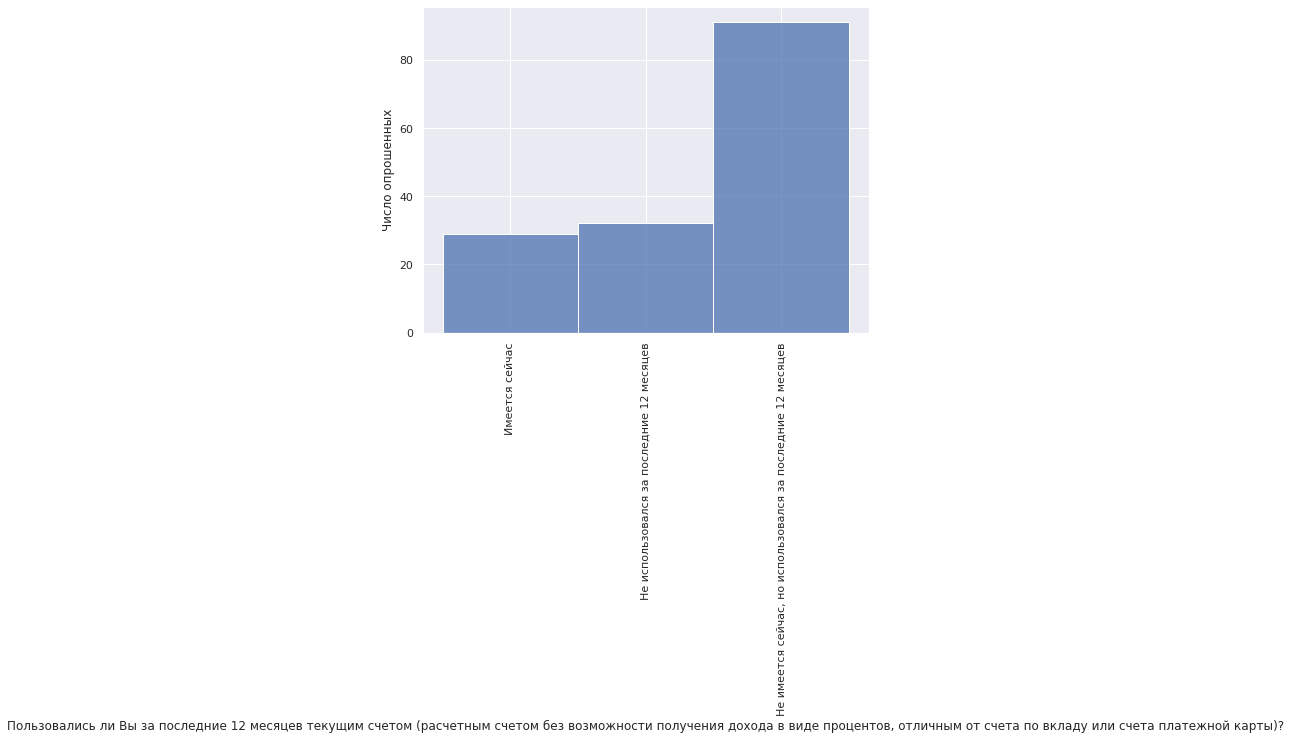

In [103]:
make_hist(kin_data.iloc[:, 323])

In [104]:
# Пользовались ли Вы следующими типами дистанционного доступа к банковскому счету
st4 = 324
end4 = 327

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Пользовались ли Вы следующими типами дистанционного доступа к банковскому счету (расчетному счету, счету по вкладу, счету платежной карты) за последние 12 месяцев? [Денежные переводы/платежи через интернет-банк с помощью стационарного компьютера или ноутбука (через веб-браузер)]","Да, пользовался(-ась)",80,"Нет, не пользовался(-ась)",72
"Пользовались ли Вы следующими типами дистанционного доступа к банковскому счету (расчетному счету, счету по вкладу, счету платежной карты) за последние 12 месяцев? [Денежные переводы/платежи через интернет-банк с помощью планшета или смартфона (через веб-браузер на мобильном устройстве без использования специального приложения (программы) и без использования смс-команд (однако на номер телефона могут приходить подтверждающие коды)]","Нет, не пользовался(-ась)",86,"Да, пользовался(-ась)",66
"Пользовались ли Вы следующими типами дистанционного доступа к банковскому счету (расчетному счету, счету по вкладу, счету платежной карты) за последние 12 месяцев? [Денежные переводы/платежи через мобильный банк с помощью специализированного мобильного приложения (программы) для смартфона или планшета]","Нет, не пользовался(-ась)",91,"Да, пользовался(-ась)",61
"Пользовались ли Вы следующими типами дистанционного доступа к банковскому счету (расчетному счету, счету по вкладу, счету платежной карты) за последние 12 месяцев? [Денежные переводы/платежи через мобильный банк посредством сообщений с использованием мобильного телефона - с помощью отправки смс на короткий номер]","Нет, не пользовался(-ась)",87,"Да, пользовался(-ась)",65


In [105]:
# Какими из перечисленных страховых продуктов (услуг) Вы пользовались за последние 12 месяцев?
st4 = 329
end4 = 331

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Какими из перечисленных страховых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Добровольное страхование жизни],"Не имеется сейчас, но использовался за последние 12 месяцев",81,Не использовался за последние 12 месяцев,58,Имеется сейчас,13
"Какими из перечисленных страховых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Другое добровольное страхование, кроме страхования жизни (добровольное личное страхование от несчастных случаев и болезни, медицинское страхование; добровольное имущественное страхование; добровольное страхование гражданской ответственности]","Не имеется сейчас, но использовался за последние 12 месяцев",76,Не использовался за последние 12 месяцев,63,Имеется сейчас,13
"Какими из перечисленных страховых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Другое обязательное страхование, кроме обязательного медицинского страхования]","Не имеется сейчас, но использовался за последние 12 месяцев",79,Не использовался за последние 12 месяцев,52,Имеется сейчас,21


In [106]:
# Насколько Вы удовлетворены работой/сервисом следующих финансовых организаций при оформлении
st4 = 333
end4 = 340

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [107]:
# Насколько Вы доверяете следующим финансовым организациям?
st4 = 341
end4 = 348

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Насколько Вы доверяете следующим финансовым организациям? [Банки],Полностью доверяю,75,Скорее доверяю,47,Не сталкивался,26,Скорее НЕ доверяю,3,Полностью НЕ доверяю,1
Насколько Вы доверяете следующим финансовым организациям? [Микрофинансовые организации],Полностью доверяю,80,Скорее доверяю,42,Не сталкивался,24,Скорее НЕ доверяю,5,Полностью НЕ доверяю,1
Насколько Вы доверяете следующим финансовым организациям? [Кредитные потребительские кооперативы],Полностью доверяю,74,Скорее доверяю,52,Не сталкивался,18,Скорее НЕ доверяю,6,Полностью НЕ доверяю,2
Насколько Вы доверяете следующим финансовым организациям? [Ломбарды],Полностью доверяю,81,Скорее доверяю,44,Не сталкивался,24,Скорее НЕ доверяю,2,Полностью НЕ доверяю,1
"Насколько Вы доверяете следующим финансовым организациям? [Субъекты страхового дела (страховые организации, общества взаимного страхования и страховые брокеры)]",Полностью доверяю,70,Скорее доверяю,54,Не сталкивался,24,Скорее НЕ доверяю,3,Полностью НЕ доверяю,1
Насколько Вы доверяете следующим финансовым организациям? [Сельскохозяйственные кредитные потребительские кооперативы],Полностью доверяю,73,Скорее доверяю,47,Не сталкивался,24,Скорее НЕ доверяю,7,Полностью НЕ доверяю,1
Насколько Вы доверяете следующим финансовым организациям? [Негосударственные пенсионные фонды],Полностью доверяю,70,Скорее доверяю,45,Не сталкивался,30,Скорее НЕ доверяю,6,Полностью НЕ доверяю,1
Насколько Вы доверяете следующим финансовым организациям? [Брокеры],Полностью доверяю,72,Скорее доверяю,45,Не сталкивался,31,Скорее НЕ доверяю,3,Полностью НЕ доверяю,1


In [108]:
#  Если говорить о Вашем населенном пункте, насколько Вы удовлетворены...?
st4 = 349
end4 = 361

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [109]:
# Какие каналы обслуживания есть практически везде в Вашем населенном пункте, а каких не хватает?
st4 = 362
end4 = 367

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [110]:
# Какими каналами Вы можете воспользоваться быстро, не тратя много времени на доступ к ним или на ожидание,
st4 = 368
end4 = 373

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [111]:
# Можете ли вы пользоваться финансовыми услугами дистанционно (с помощью персонального компьютера или мобильных устройств)?
access = dict(Counter(kin_data.iloc[:, 374]).most_common())
print(access)
print(calc_percent(access))

{'Да': 152}
{'Да': 100.0, 'Всего': 152}


In [112]:
# Оцените собственные знания и навыки в сфере финансовых продуктов и услуг, где 1 – нет знаний и навыков; 5 – отличные 

ability = dict(Counter(kin_data.iloc[:, 375]).most_common())
print(ability)
print(calc_percent(ability))

{'4 - хорошие знания': 88, '5 - отличные знания': 34, '3 - удовлетворительные знания': 30}
{'4 - хорошие знания': 57.89, '5 - отличные знания': 22.37, '3 - удовлетворительные знания': 19.74, 'Всего': 152}


In [113]:
# С какими барьерами для пользования финансовыми услугами вы сталкивались?
bar= dict(Counter(kin_data.iloc[:, 376]).most_common())
print(bar)
print(calc_percent(bar))

{'Восприятие операций, совершаемых безналичным способом, как сложных (ввиду отсутствия опыта, привычки, необходимости запоминать пин-код, пароль, вводить реквизиты документа)': 72, 'Привычка пользоваться наличными деньгами': 43, 'У меня нет барьеров для пользования финансовыми услугами': 29, 'Низкая степень доверия к финансовым организациям': 4, 'Сомнения в конфиденциальности совершаемых операций': 2, 'Дополнительные расходы за электронные расчеты': 1, 'Восприятие операций, совершаемых через механизмы электронного взаимодействия, как более опасных, имеющих повышенные риски': 1}
{'Восприятие операций, совершаемых безналичным способом, как сложных (ввиду отсутствия опыта, привычки, необходимости запоминать пин-код, пароль, вводить реквизиты документа)': 47.37, 'Привычка пользоваться наличными деньгами': 28.29, 'У меня нет барьеров для пользования финансовыми услугами': 19.08, 'Низкая степень доверия к финансовым организациям': 2.63, 'Сомнения в конфиденциальности совершаемых операций': 1

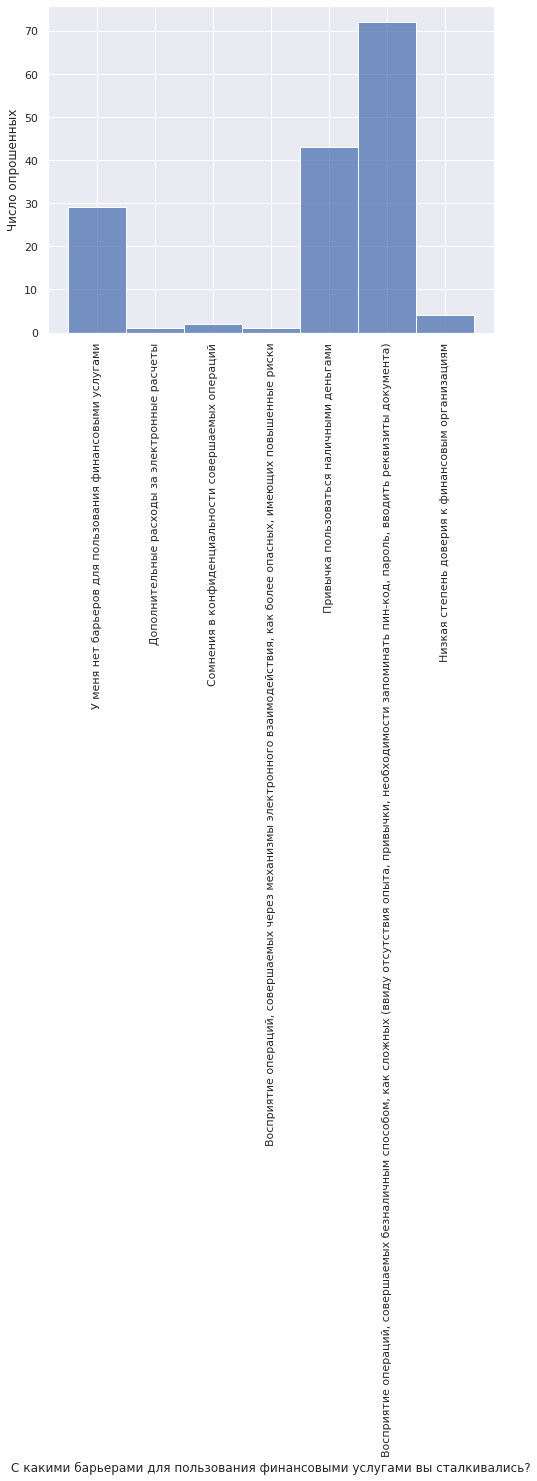

In [114]:
make_hist(kin_data.iloc[:, 376])